In [1]:
import numpy as np
import scipy as sp
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import patches

In [2]:
N = 100 # sample size
THETA = 10 # parameter of distribution
BETA = 0.95 # confidence probability

In [3]:
def cdf_inverse(Fx, theta=THETA):
    return ((Fx+1) * theta).astype(float)


def generate_sample(n=N, theta=THETA, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)
    Fx = np.random.sample(n)
    return cdf_inverse(Fx, theta)


sample = generate_sample(random_state=42)
print('sample =', sample)

sample = [13.74540119 19.50714306 17.31993942 15.98658484 11.5601864  11.5599452
 10.58083612 18.66176146 16.01115012 17.08072578 10.20584494 19.69909852
 18.32442641 12.12339111 11.81824967 11.8340451  13.04242243 15.24756432
 14.31945019 12.9122914  16.11852895 11.39493861 12.92144649 13.66361843
 14.56069984 17.85175961 11.99673782 15.14234438 15.92414569 10.46450413
 16.07544852 11.70524124 10.65051593 19.48885537 19.65632033 18.08397348
 13.04613769 10.97672114 16.84233027 14.40152494 11.22038235 14.9517691
 10.34388521 19.09320402 12.58779982 16.62522284 13.11711076 15.20068021
 15.46710279 11.84854456 19.69584628 17.75132823 19.39498942 18.9482735
 15.97899979 19.21874235 10.88492502 11.95982862 10.45227289 13.25330331
 13.8867729  12.71349032 18.28737509 13.56753327 12.8093451  15.42696083
 11.40924225 18.02196981 10.74550644 19.86886937 17.72244769 11.98715682
 10.05522117 18.15461428 17.06857344 17.29007168 17.71270347 10.74044652
 13.58465729 11.1586906  18.63103426 16.23298

In [4]:
def cdf_inverse(Fx, theta=THETA):
    return ((Fx+1) * theta).astype(float)


def generate_sample(n=N, theta=THETA, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)
    Fx = np.random.sample(n)
    return cdf_inverse(Fx, theta)


sample = generate_sample(random_state=42)
print('sample =', sample)

sample = [13.74540119 19.50714306 17.31993942 15.98658484 11.5601864  11.5599452
 10.58083612 18.66176146 16.01115012 17.08072578 10.20584494 19.69909852
 18.32442641 12.12339111 11.81824967 11.8340451  13.04242243 15.24756432
 14.31945019 12.9122914  16.11852895 11.39493861 12.92144649 13.66361843
 14.56069984 17.85175961 11.99673782 15.14234438 15.92414569 10.46450413
 16.07544852 11.70524124 10.65051593 19.48885537 19.65632033 18.08397348
 13.04613769 10.97672114 16.84233027 14.40152494 11.22038235 14.9517691
 10.34388521 19.09320402 12.58779982 16.62522284 13.11711076 15.20068021
 15.46710279 11.84854456 19.69584628 17.75132823 19.39498942 18.9482735
 15.97899979 19.21874235 10.88492502 11.95982862 10.45227289 13.25330331
 13.8867729  12.71349032 18.28737509 13.56753327 12.8093451  15.42696083
 11.40924225 18.02196981 10.74550644 19.86886937 17.72244769 11.98715682
 10.05522117 18.15461428 17.06857344 17.29007168 17.71270347 10.74044652
 13.58465729 11.1586906  18.63103426 16.23298

In [5]:
all_intervals = []

In [6]:
# calculated in workbook
def exact_confidence_interval(sample, beta=BETA, precision=3):
    x_max = np.max(sample)
    t1 = x_max / (((1+beta)/2) ** (1/np.size(sample)) + 1)
    t2 = x_max / (((1-beta)/2) ** (1/np.size(sample)) + 1)
    return round(t1, precision), round(t2, precision)


t1, t2 = exact_confidence_interval(sample)
print(f'Exact Confidence Interval = ({t1}, {t2})')

all_intervals.append((t1, t2))

Exact Confidence Interval = (9.936, 10.118)


In [7]:
def calc_quantiles(beta):
    erfinv = sp.special.erfinv
    u1 = 2**0.5 * erfinv(-beta)
    u2 = -u1
    return u1, u2


def asymptotic_confidence_interval(sample, beta=BETA, precision=3):
    n = np.size(sample)
    mean = np.mean(sample)
    square_mean = np.dot(sample, sample) / n

    u1, u2 = calc_quantiles(beta)
    t1 = 3/2 * u1 * ((square_mean-mean**2)/n)**0.5 + 2/3*mean
    t2 = 3/2 * u2 * ((square_mean-mean**2)/n)**0.5 + 2/3*mean
    return round(t1, precision), round(t2, precision)


t1, t2 = asymptotic_confidence_interval(sample)
print(f'Asymptotic Confidence Interval = ({t1}, {t2})')

all_intervals.append((t1, t2))

Asymptotic Confidence Interval = (8.931, 10.671)


In [8]:
def est_1(sample):
    mean = np.mean(sample)
    return 2/3 * mean


def est_2(sample):
    n = np.size(sample)
    x_max = np.max(sample)
    return (n+1)/(2*n+1) * x_max


def est_3(sample):
    n = np.size(sample)
    x_max = np.max(sample)
    x_min = np.min(sample)
    return (n+1)/(5*n+4) * (x_min+2*x_max)


n_est = np.array([est_1, est_2, est_3])
n_est_formula = [r'\frac{2}{3}\overline{x}',
                 r'\frac{n+1}{2n+1}x_{max}',
                 r'\frac{n+1}{5n+4}(x_{min}+2x_{max})']

print(f'Estimates: {"; ".join([f"est_{i+1}={round(est(sample), 3)}" for i, est in enumerate(n_est)])}')

Estimates: est_1=9.801; est_2=9.984; est_3=9.978


In [9]:
def bootstrap_confidence_interval(sample, estimation, beta=BETA, BOOTSTRAP_RANGE=1000, precision=3):
    theta_est = estimation(sample)
    deltas = []
    for i in range(BOOTSTRAP_RANGE):
        sample_i = np.random.choice(sample, size=np.size(sample))
        deltas.append(estimation(sample_i) - theta_est)
    k1 = int((1-beta)/2 * BOOTSTRAP_RANGE) - 1
    k2 = int((1+beta)/2 * BOOTSTRAP_RANGE) - 1
    deltas = np.sort(deltas)
    t1 = -deltas[k2] + theta_est
    t2 = -deltas[k1] + theta_est
    return round(t1, precision), round(t2, precision)


intervals = [bootstrap_confidence_interval(sample, est_i) for est_i in n_est]
print('Bootstrap Confidence Intervals:', '; '.join([f'est_{i+1}=({interv[0]}, {interv[1]})' for i, interv in enumerate(intervals)]), end=';\n')

all_intervals.extend(intervals)

Bootstrap Confidence Intervals: est_1=(9.407, 10.177); est_2=(9.984, 10.091); est_3=(9.921, 10.064);


In [10]:
def bootstrap_with_parameter_confidence_interval(sample, estimation, beta=BETA, BOOTSTRAP_RANGE=10_000, precision=3):
    theta_est = estimation(sample)
    thetas = []
    for i in range(BOOTSTRAP_RANGE):
        sample_i = generate_sample(theta=theta_est)
        thetas.append(estimation(sample_i))
    thetas = np.sort(thetas)
    k1 = int((1-beta)/2 * BOOTSTRAP_RANGE) - 1
    k2 = int((1+beta)/2 * BOOTSTRAP_RANGE) - 1
    t1 = thetas[k1]
    t2 = thetas[k2]
    return round(t1, precision), round(t2, precision)


intervals = [bootstrap_with_parameter_confidence_interval(sample, est_i, BOOTSTRAP_RANGE=50_000) for est_i in n_est]
print('Bootstrap with parameter Confidence Intervals:', '; '.join([f'est_{i+1}=({interv[0]}, {interv[1]})' for i, interv in enumerate(intervals)]), end=';\n')

all_intervals.extend(intervals)

Bootstrap with parameter Confidence Intervals: est_1=(9.429, 10.172); est_2=(9.853, 10.032); est_3=(9.871, 10.049);


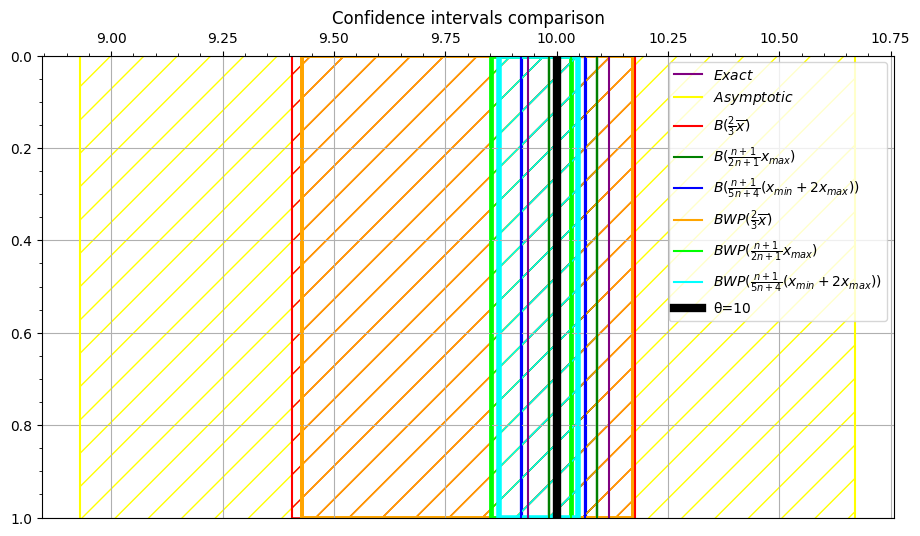

In [11]:
fig, ax = plt.subplots(figsize=(11, 6))

y_min, y_max = 0, 1

plt.title('Confidence intervals comparison')
plt.ylim(y_min, y_max)
ax.minorticks_on()
ax.grid(which='major')

colors = ['purple', 'yellow', 'red', 'green', 'blue', 'orange', 'lime', 'cyan']

labels = ['Exact', 'Asymptotic'] + [f'B({formula})' for formula in n_est_formula] + [f'BWP({formula})' for formula in n_est_formula]
labels += [f'θ={THETA}']
min_width, max_width = 0, 4
linewidths = np.linspace(min_width, max_width, len(all_intervals))

y = [y_min, y_max]

for i, interv in enumerate(all_intervals):
    xi1=[interv[0], interv[0]]
    xi2=[interv[1], interv[1]]
    ax.plot(xi1, y, color=colors[i], label=fr'${labels[i]}$')
    ax.plot(xi2, y, color=colors[i])
    patch = patches.Rectangle((xi1[0], y[0]), xi2[0]-xi1[0], y[1], linewidth=linewidths[i], fill=None, hatch='/', color=colors[i])
    ax.add_patch(patch)

ax.plot((THETA, THETA), y, color='black', label=labels[-1], linewidth=max_width*1.5)

plt.gca().invert_yaxis()
plt.gca().axes.xaxis.set_ticks_position("top")
plt.legend()

fig1 = plt.gcf()
plt.show()

fig1.savefig('Task_4', dpi=120)